In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [59]:
# Read data
df = pd.read_csv('Heart_Disease.csv')

In [60]:
df.head()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,Female,4,130,322,0,2,109,0,2.4,2,3,3,Private,formerly smoked,Yes
1,2,67.0,Male,3,115,564,0,2,160,0,1.6,2,0,7,Self-employed,never smoked,No
2,3,57.0,Female,2,124,261,0,0,141,0,0.3,1,0,7,Private,never smoked,Yes
3,4,64.0,Female,4,128,263,0,0,105,1,0.2,2,1,7,Private,smokes,No
4,5,74.0,Male,2,120,269,0,2,121,1,0.2,1,1,3,Self-employed,never smoked,No


In [61]:
df.shape

(270, 17)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      264 non-null    float64
 2   Gender                   264 non-null    object 
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  work_type                2

In [63]:
df.isnull().sum()

id                         0
Age                        6
Gender                     6
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64

In [64]:
print(f'the unique values of Gender: {df["Gender"].unique()}')
print(f'the unique values of work type: {df["work_type"].unique()}')
print(f'the unique values of smoking_status : {df["smoking_status"].unique()}')
print(f'the unique values of Heart Disease : {df["Heart Disease"].unique()}')
print(f'the unique values of Number of vessels fluro : {df["Number of vessels fluro"].unique()}')
print(f'the unique values of Slope of ST     : {df["Slope of ST"].unique()}')
print(f'the unique values of Exercise angina      : {df["Exercise angina"].unique()}')
print(f'the unique values of FBS over 120   : {df["FBS over 120"].unique()}')
print(f'the unique values of EKG results     : {df["EKG results"].unique()}')


the unique values of Gender: ['Female' 'Male' nan]
the unique values of work type: ['Private' 'Self-employed' 'Govt_job' nan 'children' 'Never_worked']
the unique values of smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown' nan]
the unique values of Heart Disease : ['Yes' 'No']
the unique values of Number of vessels fluro : [3 0 1 2]
the unique values of Slope of ST     : [2 1 3]
the unique values of Exercise angina      : [0 1]
the unique values of FBS over 120   : [0 1]
the unique values of EKG results     : [2 0 1]


<AxesSubplot:xlabel='Thallium', ylabel='count'>

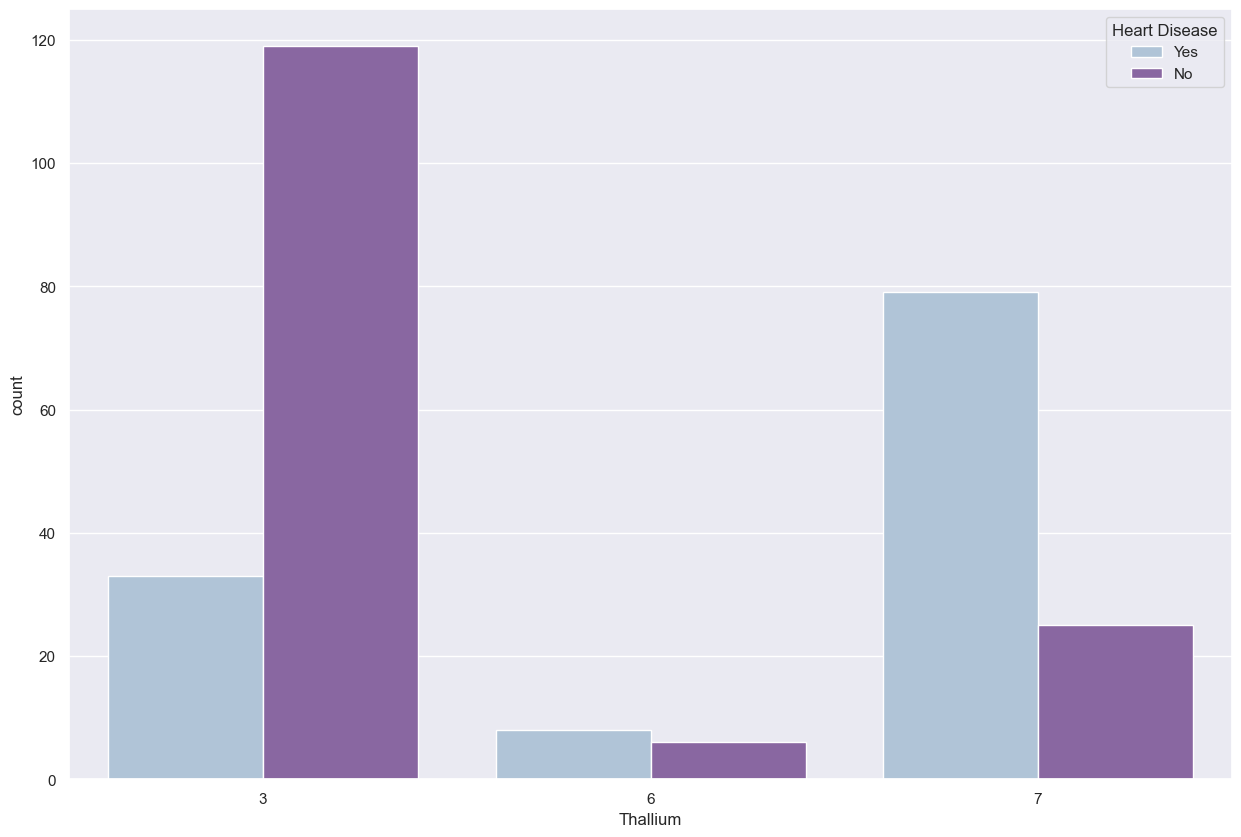

In [65]:
sns.countplot(x='Thallium', data=df, hue="Heart Disease", palette='BuPu')

<AxesSubplot:xlabel='Gender', ylabel='count'>

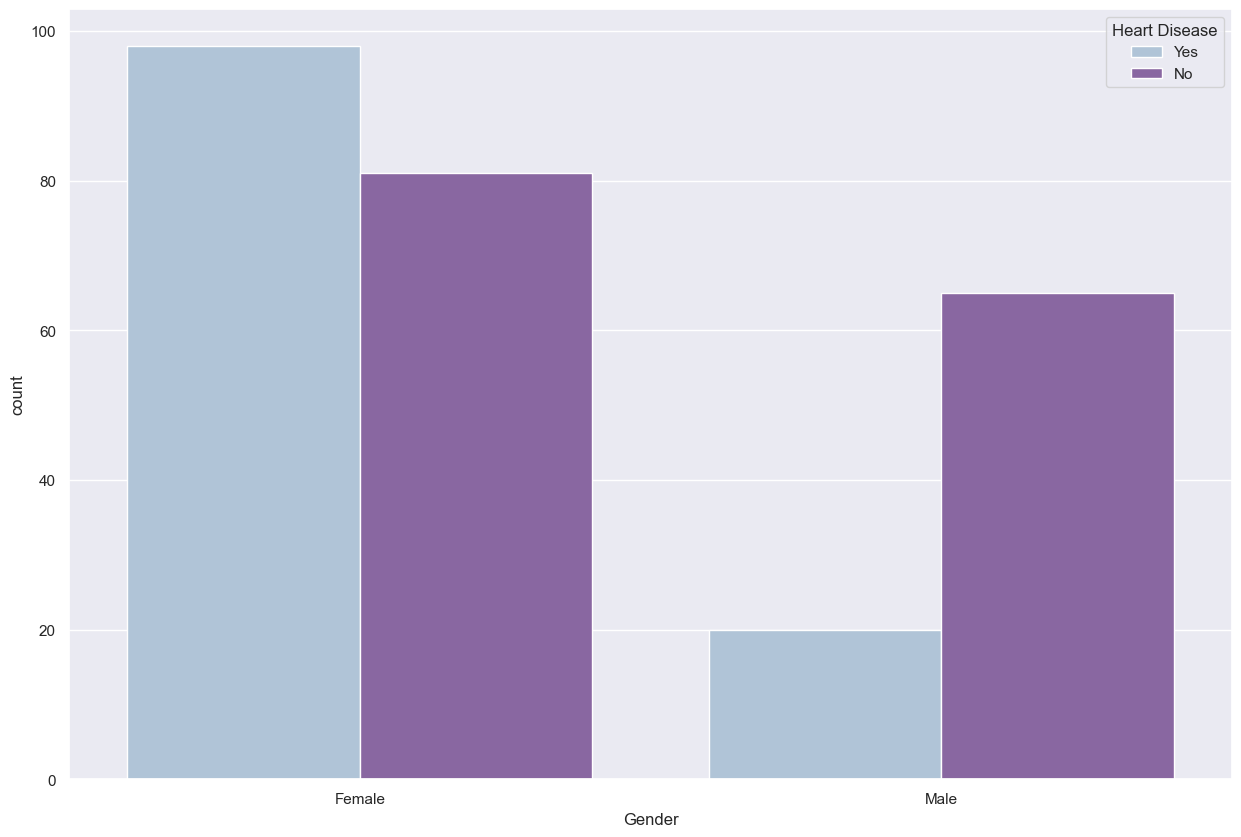

In [66]:
sns.countplot(x='Gender', data=df, hue="Heart Disease", palette='BuPu')

In [67]:
##1-changed the object to numeric values
##2-dropped the id colum
##3-no duplicates
##4- removed the outliers
##n3ml eh tani??


In [68]:
from sklearn import preprocessing 
label_encoder=preprocessing.LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['work_type']=label_encoder.fit_transform(df['work_type'])
df['Heart Disease']=label_encoder.fit_transform(df['Heart Disease'])
df['smoking_status']=label_encoder.fit_transform(df['smoking_status'])
df.isnull().sum()

id                         0
Age                        6
Gender                     0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  0
smoking_status             0
Heart Disease              0
dtype: int64

In [69]:
print(df['Gender'].unique())  # null filled with 2
print(df['work_type'].unique()) # null filled with 5
print(df['Heart Disease'].unique()) 
print(df['smoking_status'].unique()) # null filled with 4   

[0 1 2]
[2 3 0 5 4 1]
[1 0]
[1 2 3 0 4]


In [70]:
##df['Gender']=np.where(df['Gender']=='Female',0,1)
##df['work_type']= np.where(df['work_type']=='Private',0,np.where(df['work_type']=='Self-employed',1,np.where(df['work_type']=='Govt_job',2,np.where(df['work_type']=='children',3,4))))
##df['Heart Disease']=np.where(df['Heart Disease']=='No',0,1)
##df['smoking_status']= np.where(df['smoking_status']=='never smoked',0,np.where(df['smoking_status']=='smokes',1,np.where(df['smoking_status']=='formerly smoked',2,3)))
df.head(30)

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,0,4,130,322,0,2,109,0,2.4,2,3,3,2,1,1
1,2,67.0,1,3,115,564,0,2,160,0,1.6,2,0,7,3,2,0
2,3,57.0,0,2,124,261,0,0,141,0,0.3,1,0,7,2,2,1
3,4,64.0,0,4,128,263,0,0,105,1,0.2,2,1,7,2,3,0
4,5,74.0,1,2,120,269,0,2,121,1,0.2,1,1,3,3,2,0
5,6,65.0,0,4,120,177,0,0,140,0,0.4,1,0,7,2,1,0
6,7,56.0,0,3,130,256,1,2,142,1,0.6,2,1,6,2,2,1
7,8,59.0,0,4,110,239,0,2,142,1,1.2,2,1,7,2,2,1
8,9,60.0,0,4,140,293,0,2,170,0,1.2,2,2,7,2,0,1
9,10,63.0,1,4,150,407,0,2,154,0,4.0,2,3,7,2,0,1


In [71]:
df['Gender']=df['Gender'].replace(2,np.nan)
df['work_type']=df['work_type'].replace(5,np.nan)
df['smoking_status']=df['smoking_status'].replace(4,np.nan)
df.head(30)

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,0.0,4,130,322,0,2,109,0,2.4,2,3,3,2.0,1.0,1
1,2,67.0,1.0,3,115,564,0,2,160,0,1.6,2,0,7,3.0,2.0,0
2,3,57.0,0.0,2,124,261,0,0,141,0,0.3,1,0,7,2.0,2.0,1
3,4,64.0,0.0,4,128,263,0,0,105,1,0.2,2,1,7,2.0,3.0,0
4,5,74.0,1.0,2,120,269,0,2,121,1,0.2,1,1,3,3.0,2.0,0
5,6,65.0,0.0,4,120,177,0,0,140,0,0.4,1,0,7,2.0,1.0,0
6,7,56.0,0.0,3,130,256,1,2,142,1,0.6,2,1,6,2.0,2.0,1
7,8,59.0,0.0,4,110,239,0,2,142,1,1.2,2,1,7,2.0,2.0,1
8,9,60.0,0.0,4,140,293,0,2,170,0,1.2,2,2,7,2.0,0.0,1
9,10,63.0,1.0,4,150,407,0,2,154,0,4.0,2,3,7,2.0,0.0,1


In [72]:
mode_value = df['Gender'].mode().iloc[0]
df['Gender'] = df['Gender'].fillna(mode_value)

mode_value = df['work_type'].mode().iloc[0]
df['work_type'] = df['work_type'].fillna(mode_value)

mode_value = df['smoking_status'].mode().iloc[0]
df['smoking_status'] = df['smoking_status'].fillna(mode_value)


In [73]:
df['Age'].fillna(value=df['Age'].mean(),inplace=True)
#df['Gender'].fillna(value=df['Gender'].mean(),inplace=True)
#df['work_type'].fillna(value=df['work_type'].mean(),inplace=True)
#df['smoking_status'].fillna(value=df['smoking_status'].mean(),inplace= True)

In [74]:
df['Gender']=df['Gender'].astype(int)
df['work_type']=df['work_type'].astype(int)
df['smoking_status']=df['smoking_status'].astype(int)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      270 non-null    float64
 2   Gender                   270 non-null    int32  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  work_type                2

In [76]:
df.isnull().sum()

id                         0
Age                        0
Gender                     0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  0
smoking_status             0
Heart Disease              0
dtype: int64

In [77]:
df.head(20)

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,0,4,130,322,0,2,109,0,2.4,2,3,3,2,1,1
1,2,67.0,1,3,115,564,0,2,160,0,1.6,2,0,7,3,2,0
2,3,57.0,0,2,124,261,0,0,141,0,0.3,1,0,7,2,2,1
3,4,64.0,0,4,128,263,0,0,105,1,0.2,2,1,7,2,3,0
4,5,74.0,1,2,120,269,0,2,121,1,0.2,1,1,3,3,2,0
5,6,65.0,0,4,120,177,0,0,140,0,0.4,1,0,7,2,1,0
6,7,56.0,0,3,130,256,1,2,142,1,0.6,2,1,6,2,2,1
7,8,59.0,0,4,110,239,0,2,142,1,1.2,2,1,7,2,2,1
8,9,60.0,0,4,140,293,0,2,170,0,1.2,2,2,7,2,0,1
9,10,63.0,1,4,150,407,0,2,154,0,4.0,2,3,7,2,0,1


In [78]:
sum(df.duplicated())

0

In [79]:
df.drop(['id'], axis=1, inplace=True)
#df.drop(['Max HR'], axis=1, inplace=True)
#df.drop(['Gender'], axis=1, inplace=True)

<AxesSubplot:>

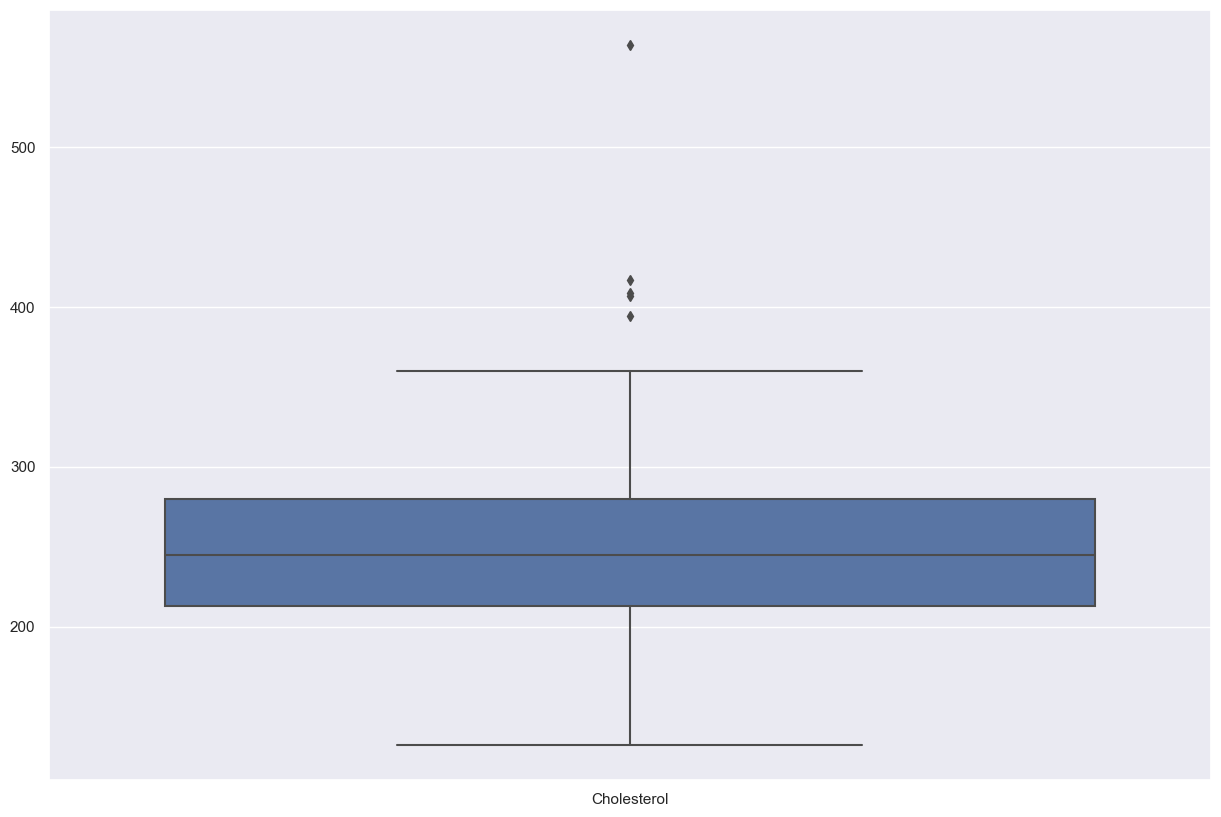

In [80]:
sns.boxplot(data=df[['Cholesterol']])

<AxesSubplot:>

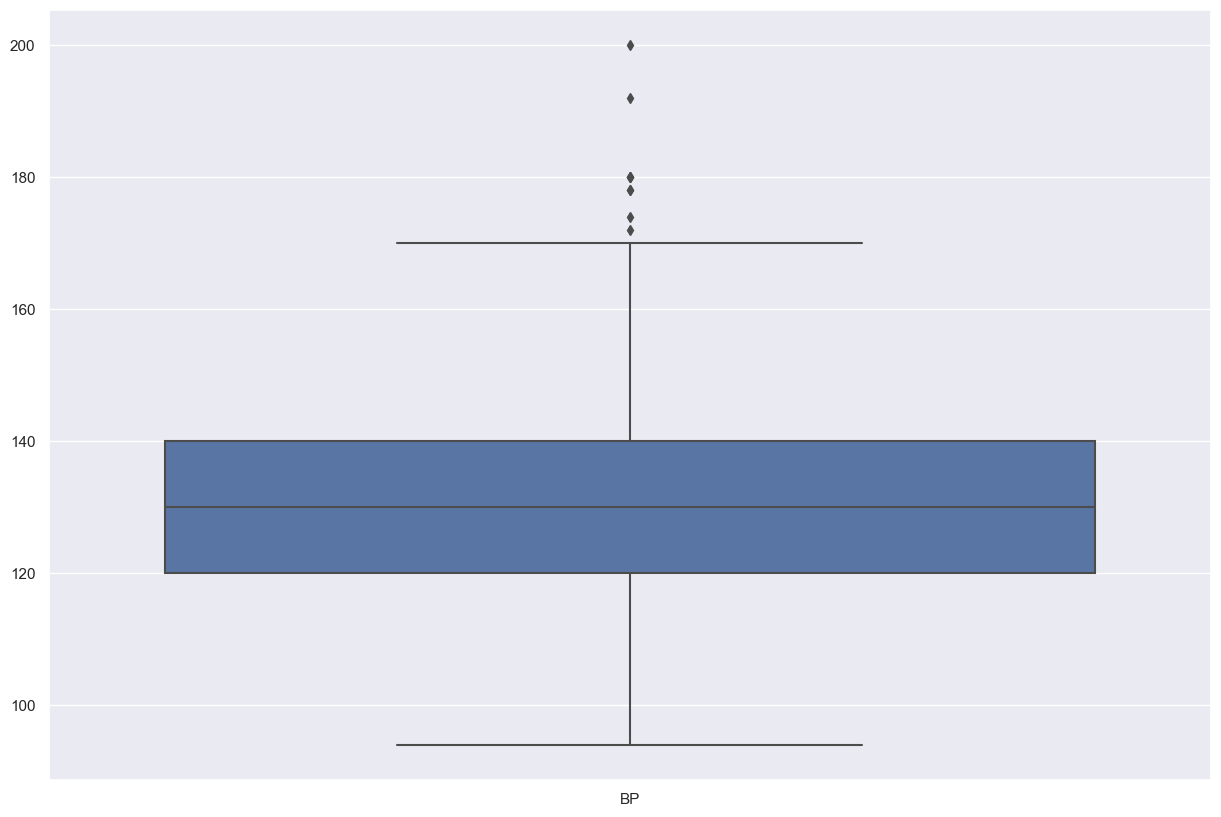

In [81]:
sns.boxplot(data=df[['BP']])

<AxesSubplot:>

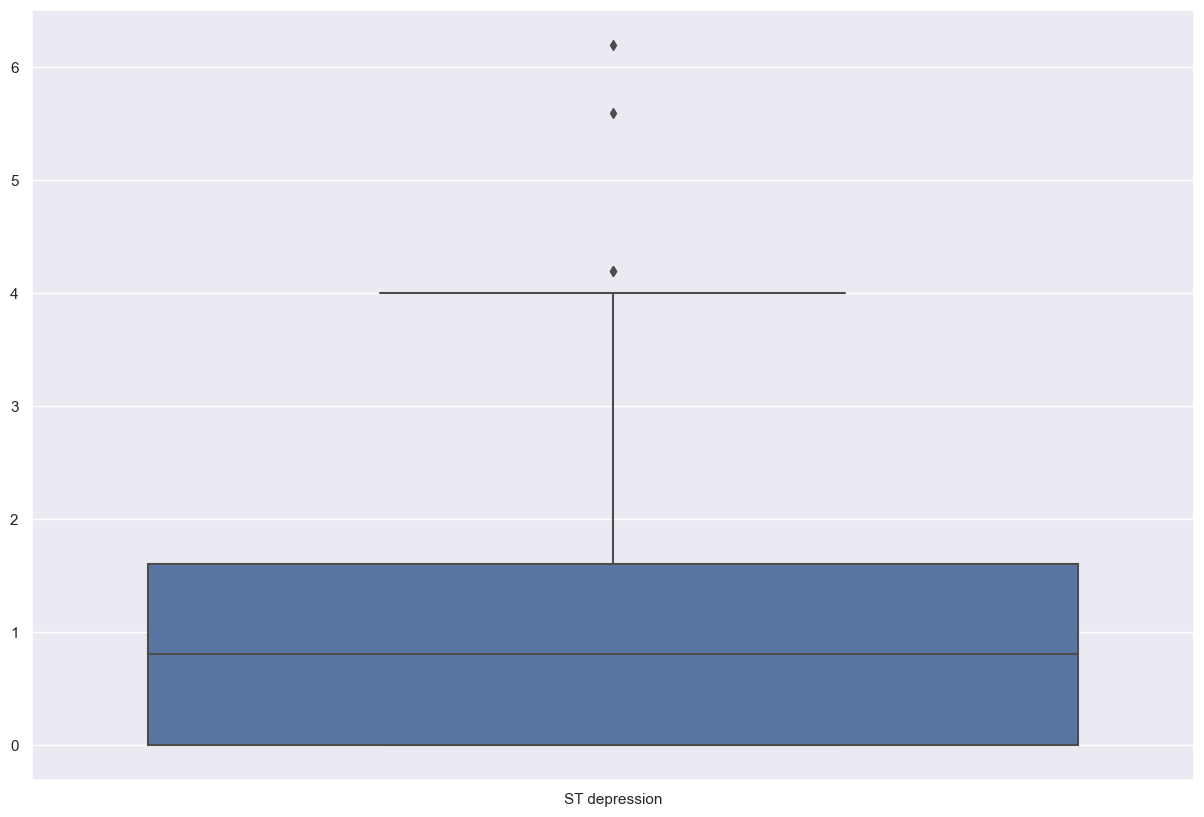

In [82]:
sns.boxplot(data=df[['ST depression']])

In [83]:
columns = ['ST depression','BP','Cholesterol']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    df.drop(index_label, inplace=True)

Number of outliers in ST depression: 4
Number of outliers in BP: 8
Number of outliers in Cholesterol: 5


<AxesSubplot:>

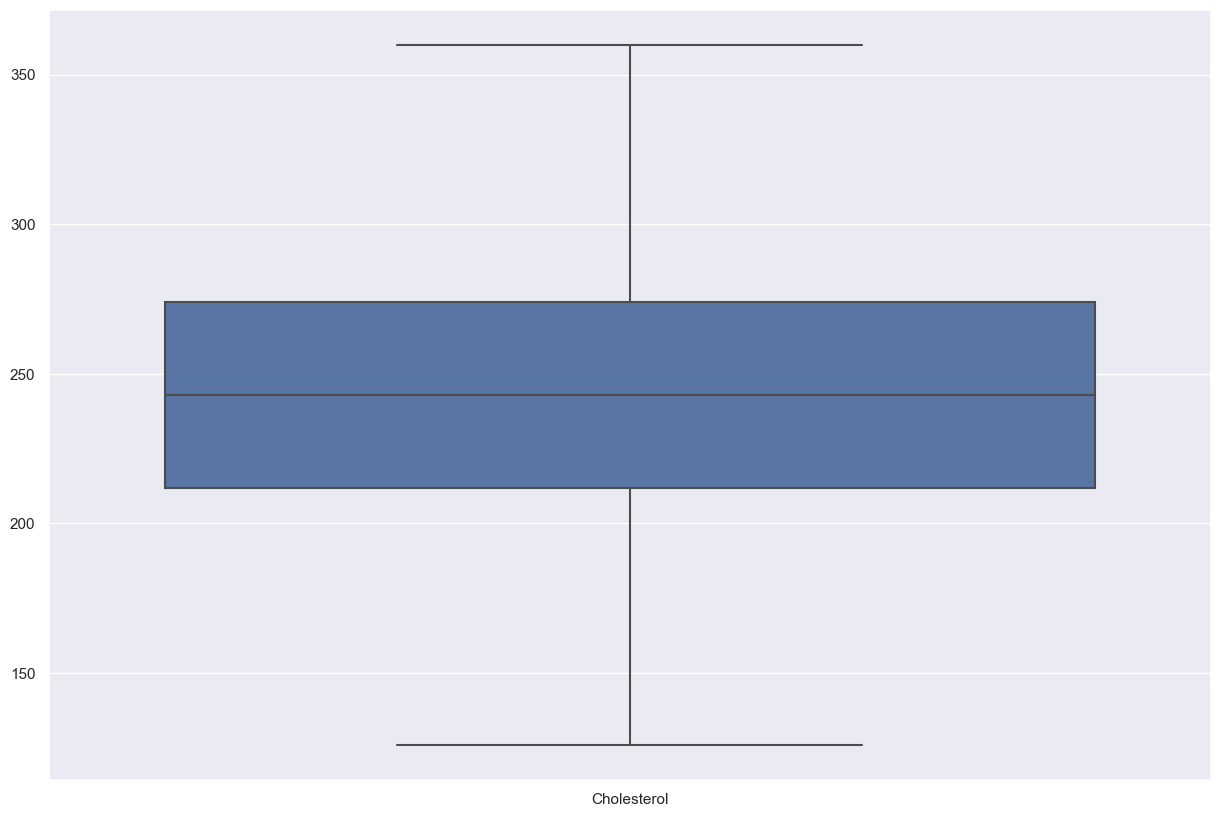

In [84]:
sns.boxplot(data=df[['Cholesterol']])

<AxesSubplot:>

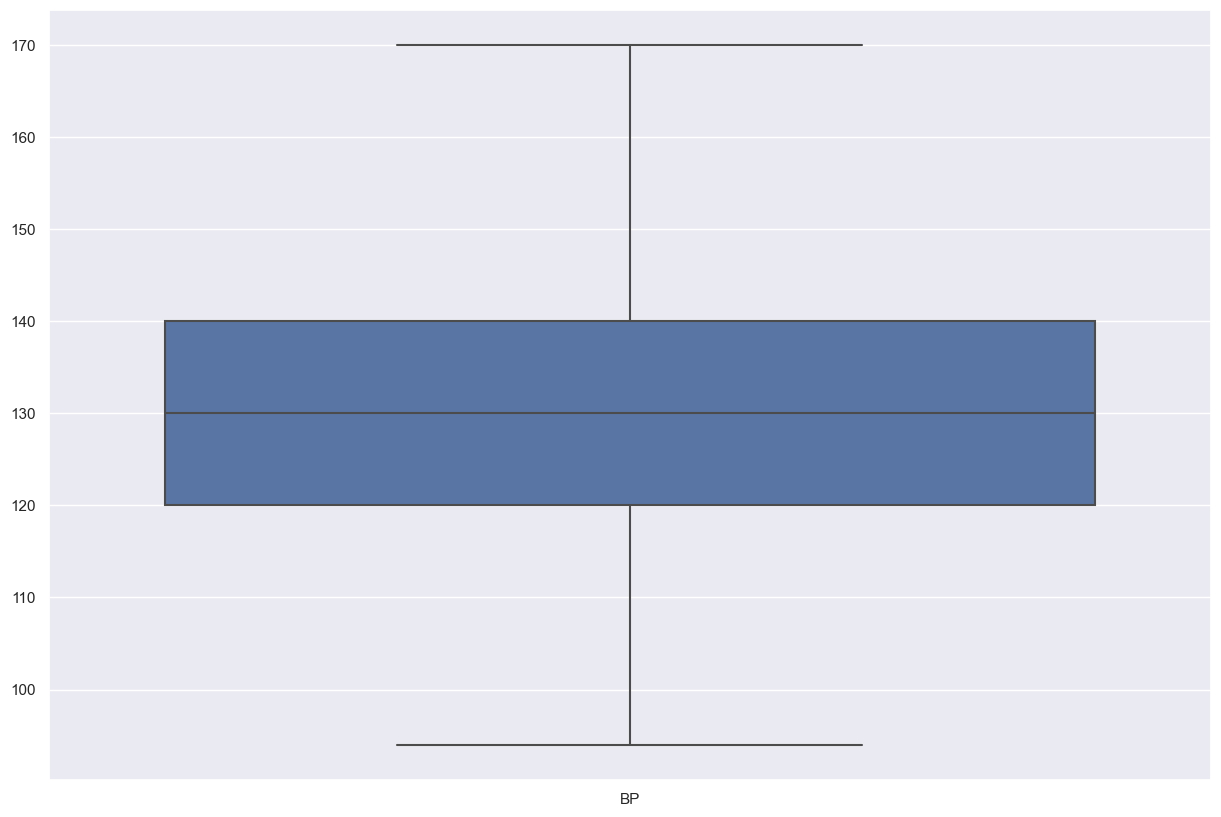

In [85]:
sns.boxplot(data=df[['BP']])

<AxesSubplot:>

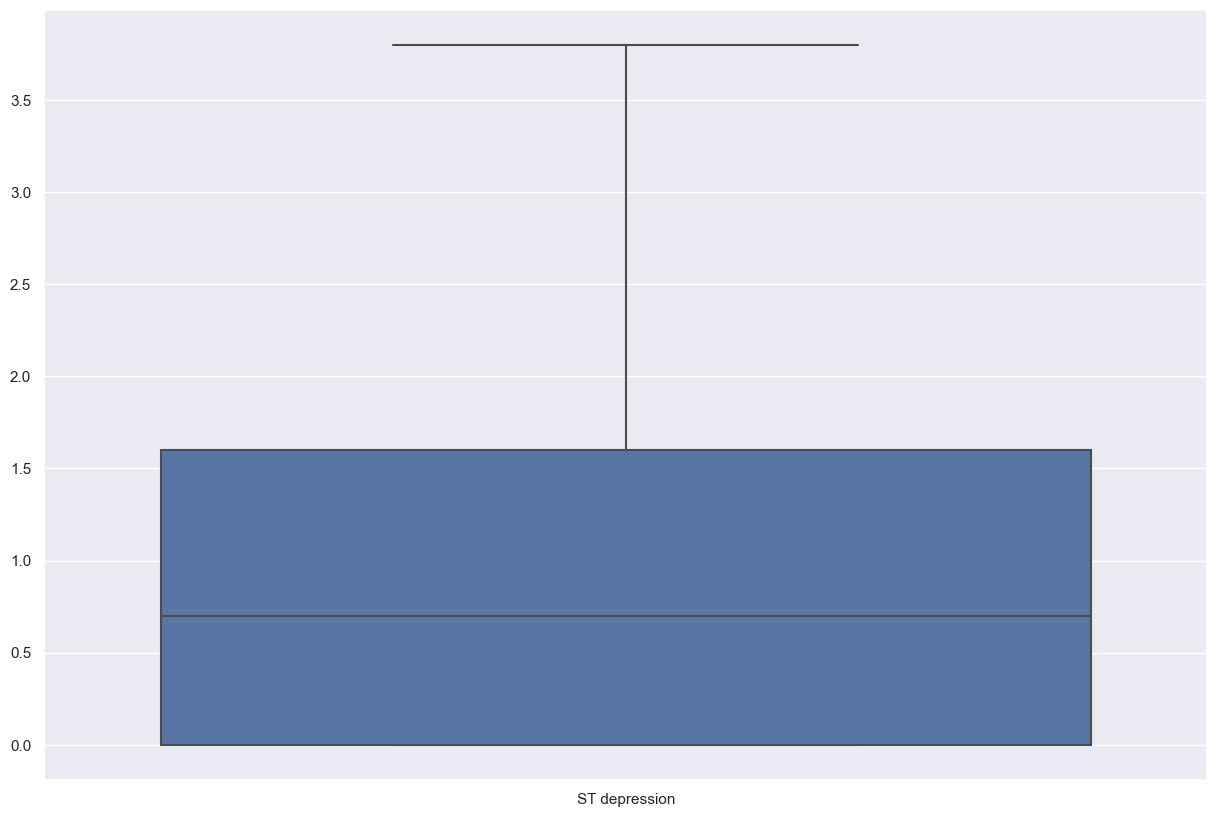

In [86]:
sns.boxplot(data=df[['ST depression']])

In [87]:
df.head()

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,70.0,0,4,130,322,0,2,109,0,2.4,2,3,3,2,1,1
2,57.0,0,2,124,261,0,0,141,0,0.3,1,0,7,2,2,1
3,64.0,0,4,128,263,0,0,105,1,0.2,2,1,7,2,3,0
4,74.0,1,2,120,269,0,2,121,1,0.2,1,1,3,3,2,0
5,65.0,0,4,120,177,0,0,140,0,0.4,1,0,7,2,1,0


In [88]:
col=['Chest pain type','EKG results','Exercise angina','Slope of ST','Number of vessels fluro','work_type','smoking_status']

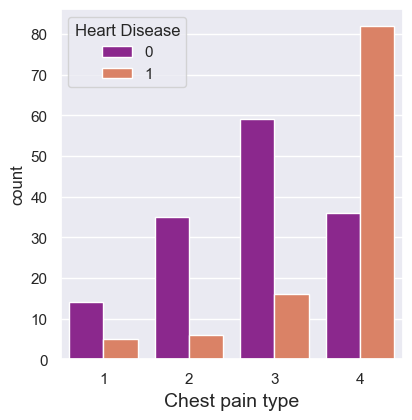

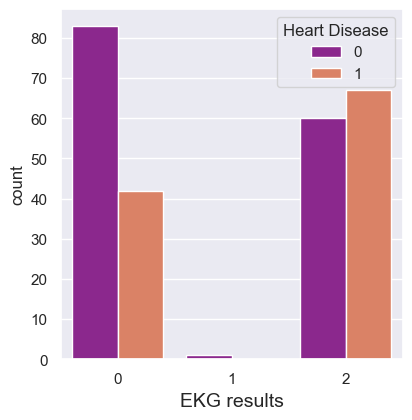

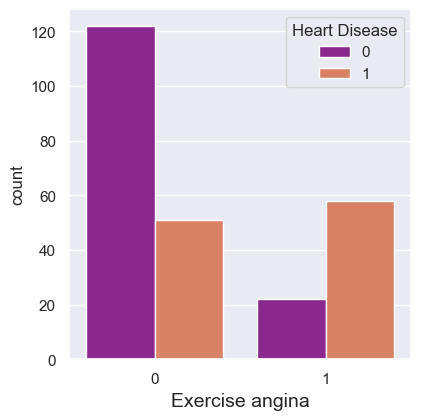

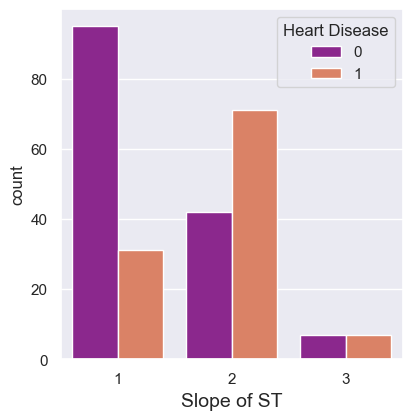

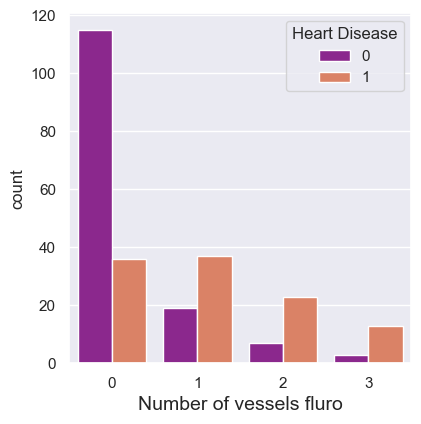

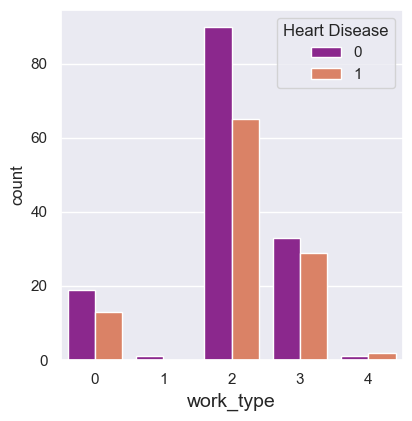

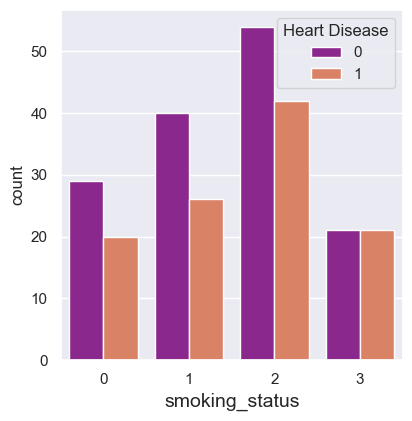

In [89]:
for i in col[:7]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Heart Disease', data=df ,palette='plasma')
    plt.xlabel(i, fontsize=14)

<AxesSubplot:>

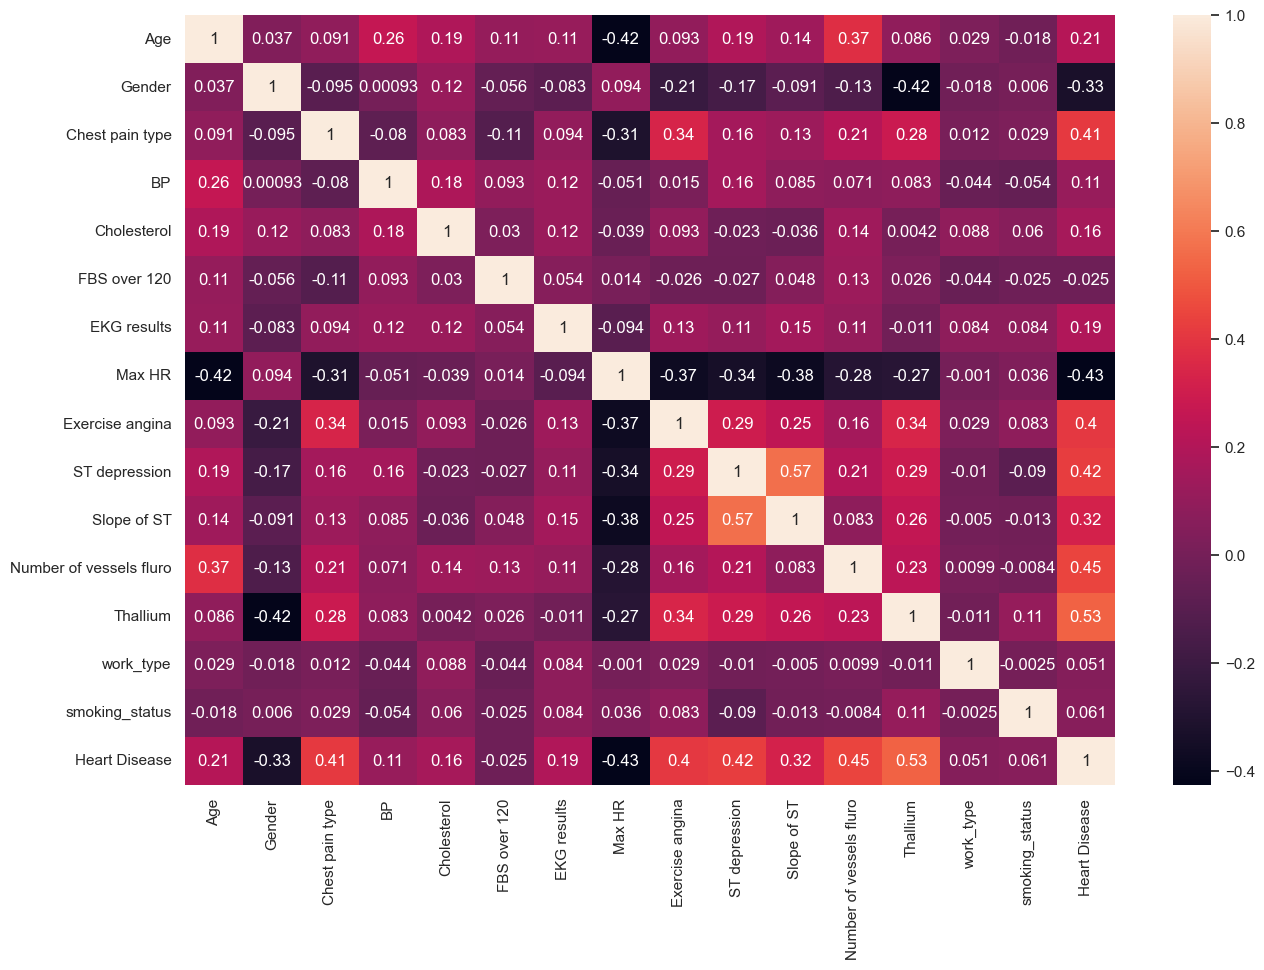

In [90]:
# plotting the correlation matrix
df.corr()
sns.set(rc={'figure.figsize': (15,10)})
sns.heatmap(df.corr(),annot=True)
#max HR is the most feature that affects the heart disease

In [91]:
X = df.drop('Heart Disease',axis=1)
y = df['Heart Disease']


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Algorithms

In [93]:
#LOGISTIC REGRESSION
classifier = LogisticRegression(random_state = 0)

In [94]:
classifier.fit(X_train, y_train)

D:\New folder (3)\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [95]:
y_pred = classifier.predict(X_test)

In [96]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[30,  6],
       [ 7, 21]], dtype=int64)

In [97]:
cr=classification_report(y_test, y_pred)
alr=accuracy_score(y_pred,y_test)*100
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        36
           1       0.78      0.75      0.76        28

    accuracy                           0.80        64
   macro avg       0.79      0.79      0.79        64
weighted avg       0.80      0.80      0.80        64



In [98]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [99]:
X_train=df.loc[:200].drop("Heart Disease",axis=1)
y_train=df.loc[:200]["Heart Disease"]

X_test=df.loc[201:].drop("Heart Disease",axis=1)
y_test=df.loc[201:]["Heart Disease"]

In [100]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [101]:
y_preds=model.predict(X_test)
KNN=accuracy_score(y_test,y_preds)*100


print(f"Testing score = {accuracy_score(y_test,y_preds)}")

Testing score = 0.696969696969697


D:\New folder (3)\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [102]:
#DecisionTree model
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
y_predict = DT.predict(X_test)
#  prediction Summary by species
print(classification_report(y_test, y_predict))
# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)*100
print(f"{round(DT_SC,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        37
           1       0.69      0.76      0.72        29

    accuracy                           0.74        66
   macro avg       0.74      0.74      0.74        66
weighted avg       0.75      0.74      0.74        66

74.24% Accurate


In [104]:
lasso_cv = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
y_PRed = lasso_cv.predict(X_test)
y_PRed = (y_PRed > 0.5).astype(int)

In [105]:
lso = metrics.accuracy_score(y_test, y_PRed)*100
print('accuracy score:', lso)

accuracy score: 86.36363636363636


In [106]:
# Creating SVM model.
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_PRED = clf.predict(X_test)

In [107]:
svm=accuracy_score(y_test,y_PRED)*100
print(accuracy_score(y_test,y_PRED))

0.696969696969697


In [108]:
rf=RandomForestClassifier(random_state=6,n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=6)

In [109]:
pred=rf.predict(X_test)
rfa=accuracy_score(y_test,pred)*100
print(rfa)

90.9090909090909


In [110]:
    score = [DT_SC,alr,KNN,lso,svm,rfa]
Models = pd.DataFrame({
    'Algorithm': ["Decision Tree","Logistic Regression","KNN","lasso","SVM","rfa"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Algorithm,Score
5,rfa,90.909091
3,lasso,86.363636
1,Logistic Regression,79.687500
0,Decision Tree,74.242424
2,KNN,69.696970
4,SVM,69.696970
